In [1]:
import numpy as np
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# settings params
params = {
    "legend.fontsize":"x-large",
    "figure.figsize":(30,10),
    "axes.labelsize":"x-large",
    "axes.titlesize":"x-large",
    "xtick.labelsize":"x-large",
    "ytick.labelsize":"x-large",
    "font.sans-serif":"SimHei",
    "axes.unicode_minus": False
}
sn.set_style('whitegrid')
sn.set_context('talk')
plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

In [2]:
hour_df = pd.read_csv('hour.csv')
hour_df.shape

(17379, 17)

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.rename(columns={'instant':'rec_id',
                       "dteday":"datetime",
                       "holiday":"is_holiday",
                       "workingday":"is_workingday",
                       "weathersit":"weather_condition",
                       "hum":"humidity",
                       "mnth":"month",
                       "cnt":"total_count",
                       "hr":"hour",
                       "yr":"year"},inplace=True)

In [6]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)
#枚举类别属性
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [8]:
hour_df.info

<bound method DataFrame.info of        rec_id   datetime season year month hour is_holiday weekday  \
0           1 2011-01-01      1    0     1    0          0       6   
1           2 2011-01-01      1    0     1    1          0       6   
2           3 2011-01-01      1    0     1    2          0       6   
3           4 2011-01-01      1    0     1    3          0       6   
4           5 2011-01-01      1    0     1    4          0       6   
...       ...        ...    ...  ...   ...  ...        ...     ...   
17374   17375 2012-12-31      1    1    12   19          0       1   
17375   17376 2012-12-31      1    1    12   20          0       1   
17376   17377 2012-12-31      1    1    12   21          0       1   
17377   17378 2012-12-31      1    1    12   22          0       1   
17378   17379 2012-12-31      1    1    12   23          0       1   

      is_workingday weather_condition  temp   atemp  humidity  windspeed  \
0                 0                 1  0.24  0.2879

In [9]:
hour_df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


[Text(0.5, 1.0, '分季节按小时需求量')]

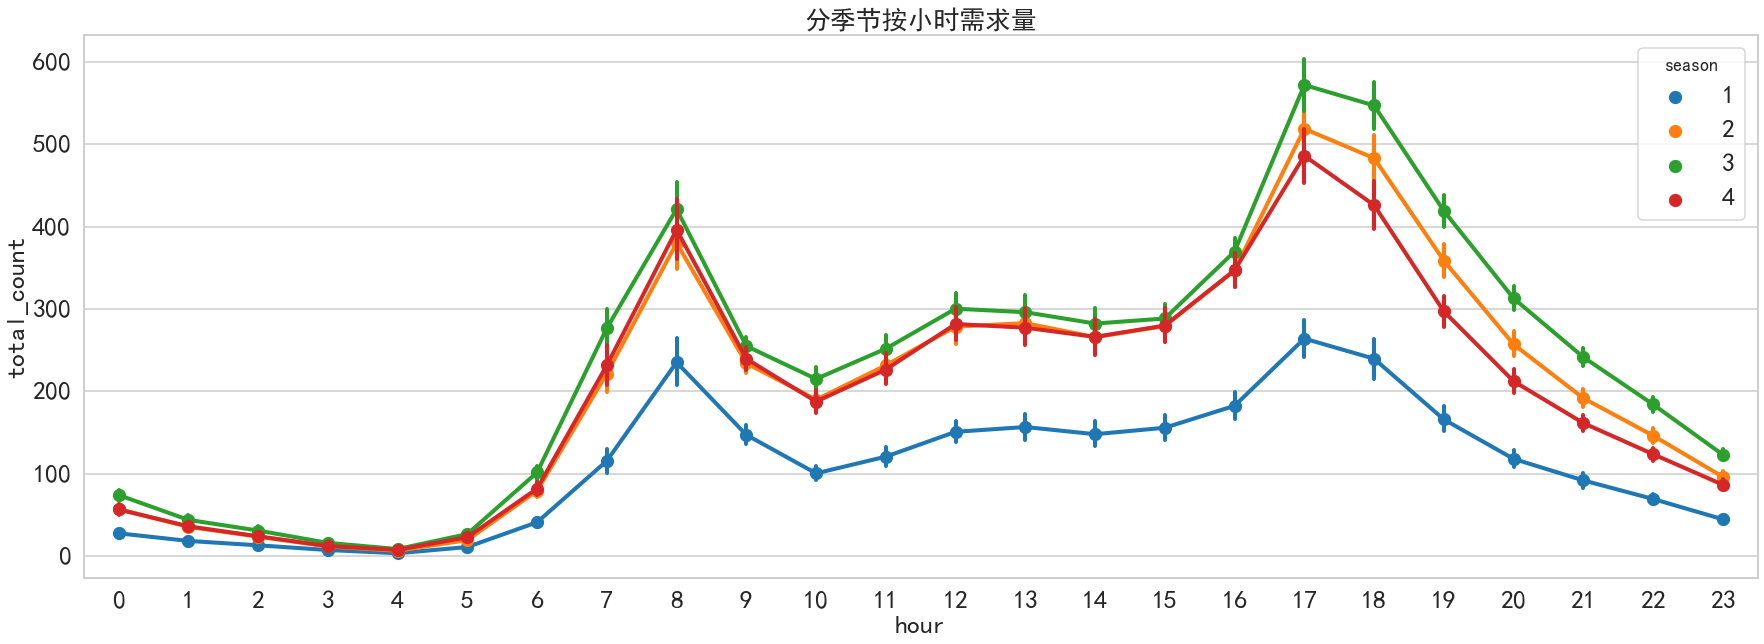

In [10]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                         'total_count',
                         'season']],
            x = 'hour', y = 'total_count',
            hue = 'season', ax = ax)
ax.set(title=u"分季节按小时需求量")

[Text(0.5, 1.0, '周内按小时需求量')]

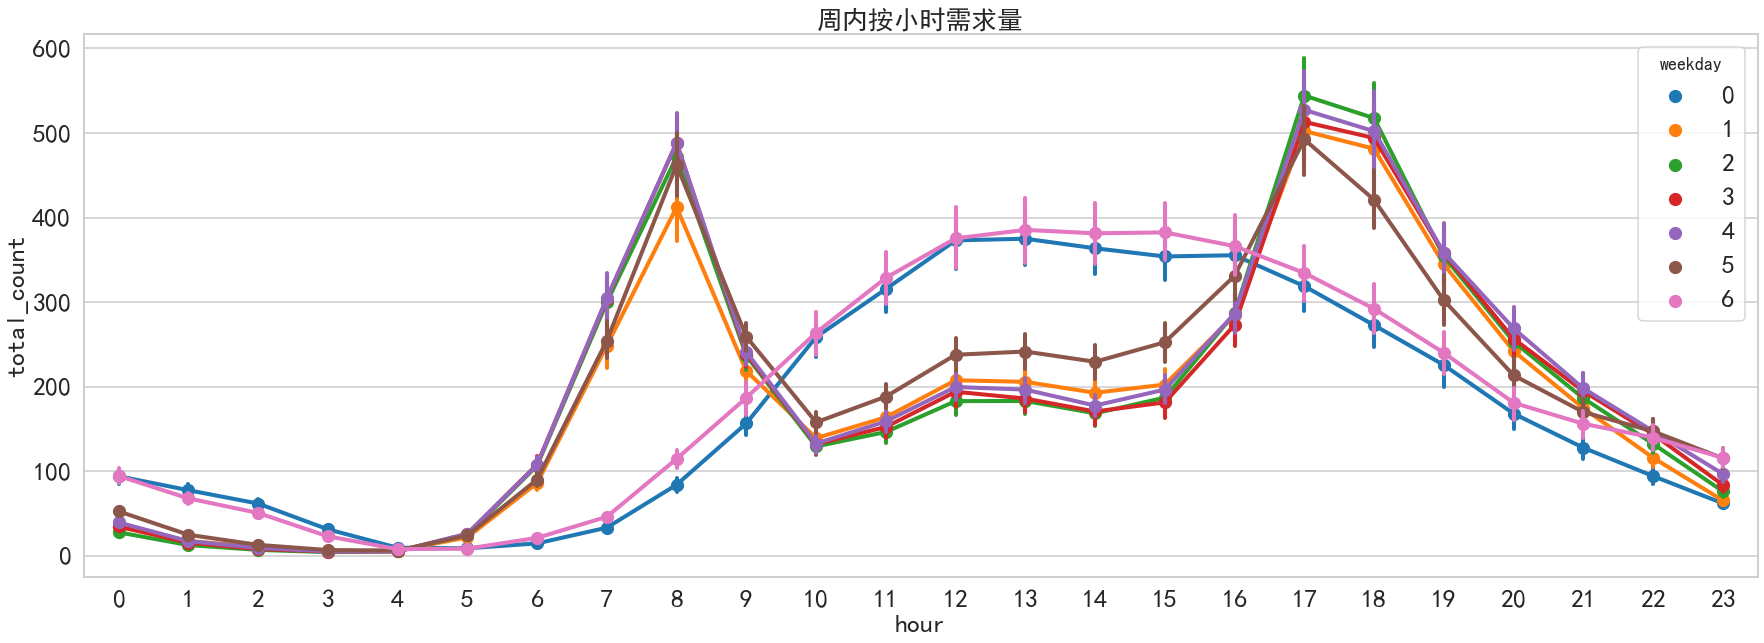

In [11]:
fig,ax = plt.subplots()
sn.pointplot(data=hour_df[['hour',
                         'total_count',
                         'weekday']],
            x = 'hour', y = 'total_count',
            hue = 'weekday', ax = ax)
ax.set(title=u"周内按小时需求量")

[Text(0.5, 1.0, '月度需求量')]

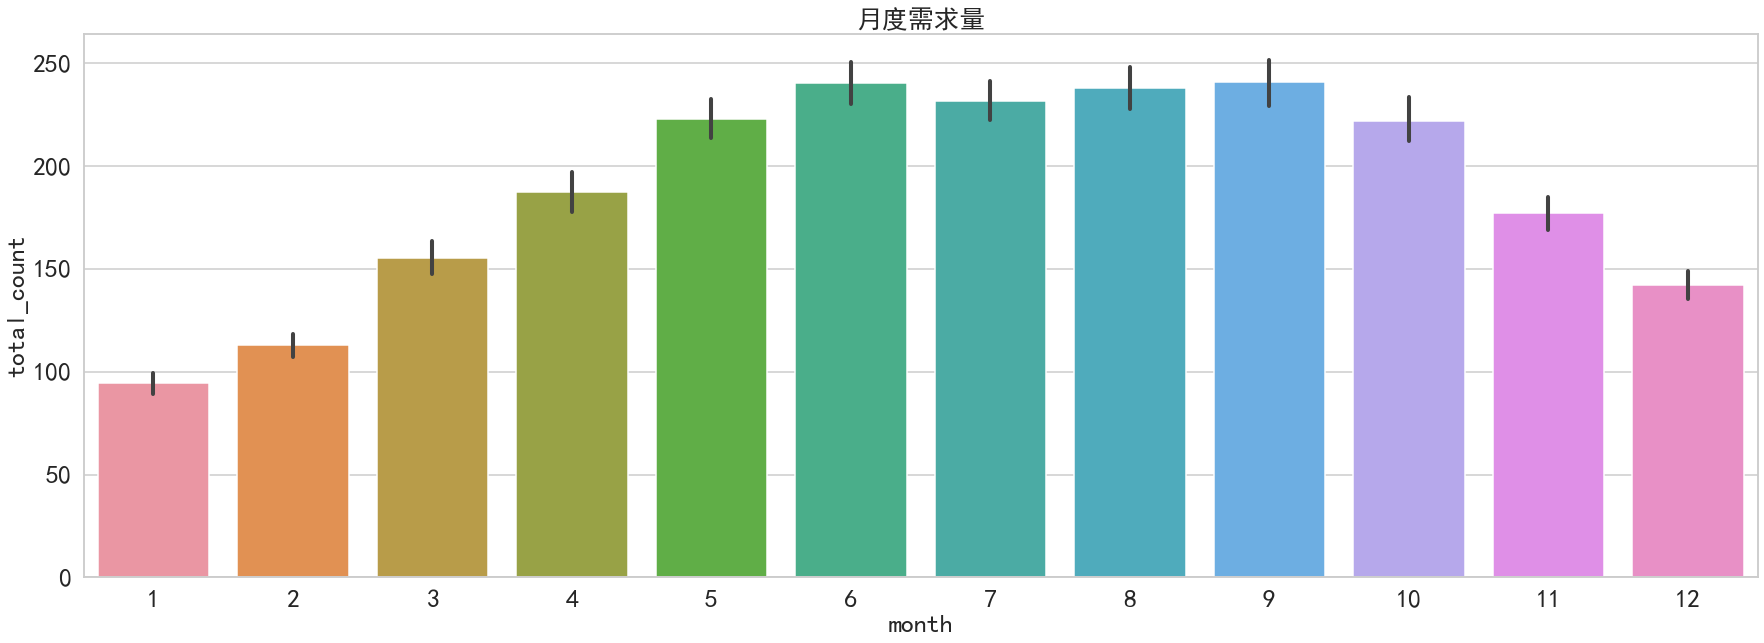

In [12]:
fig, ax = plt.subplots()
sn.barplot(data=hour_df[['month',"total_count"]],
          x="month",y="total_count")
ax.set(title=u"月度需求量")

<AxesSubplot:xlabel='year', ylabel='total_count'>

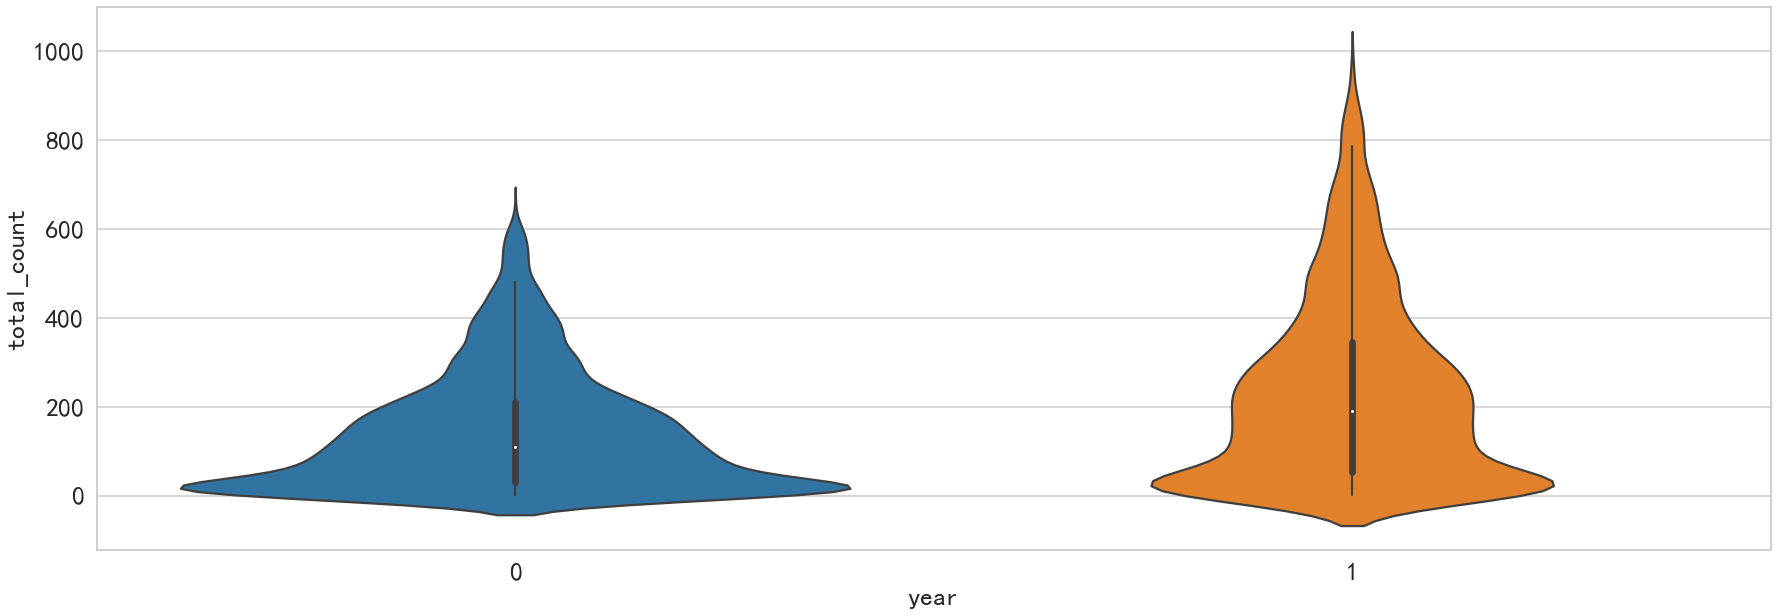

In [13]:
sn.violinplot(data=hour_df[["year","total_count"]],
             x="year",y="total_count")

<AxesSubplot:xlabel='is_workingday', ylabel='total_count'>

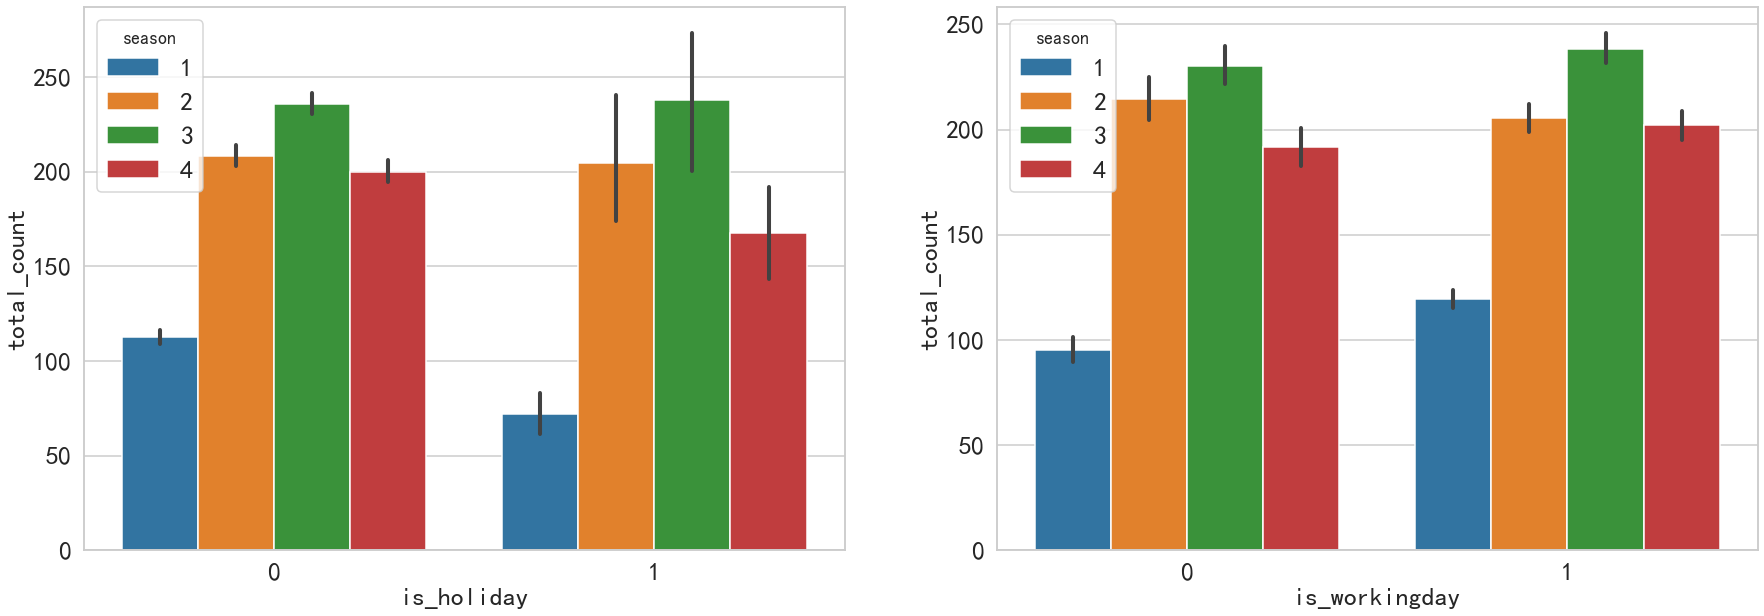

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.barplot(data=hour_df,x="is_holiday",y="total_count", hue="season",ax=ax1)
sn.barplot(data=hour_df,x="is_workingday",y="total_count", hue="season",ax=ax2)

<AxesSubplot:>

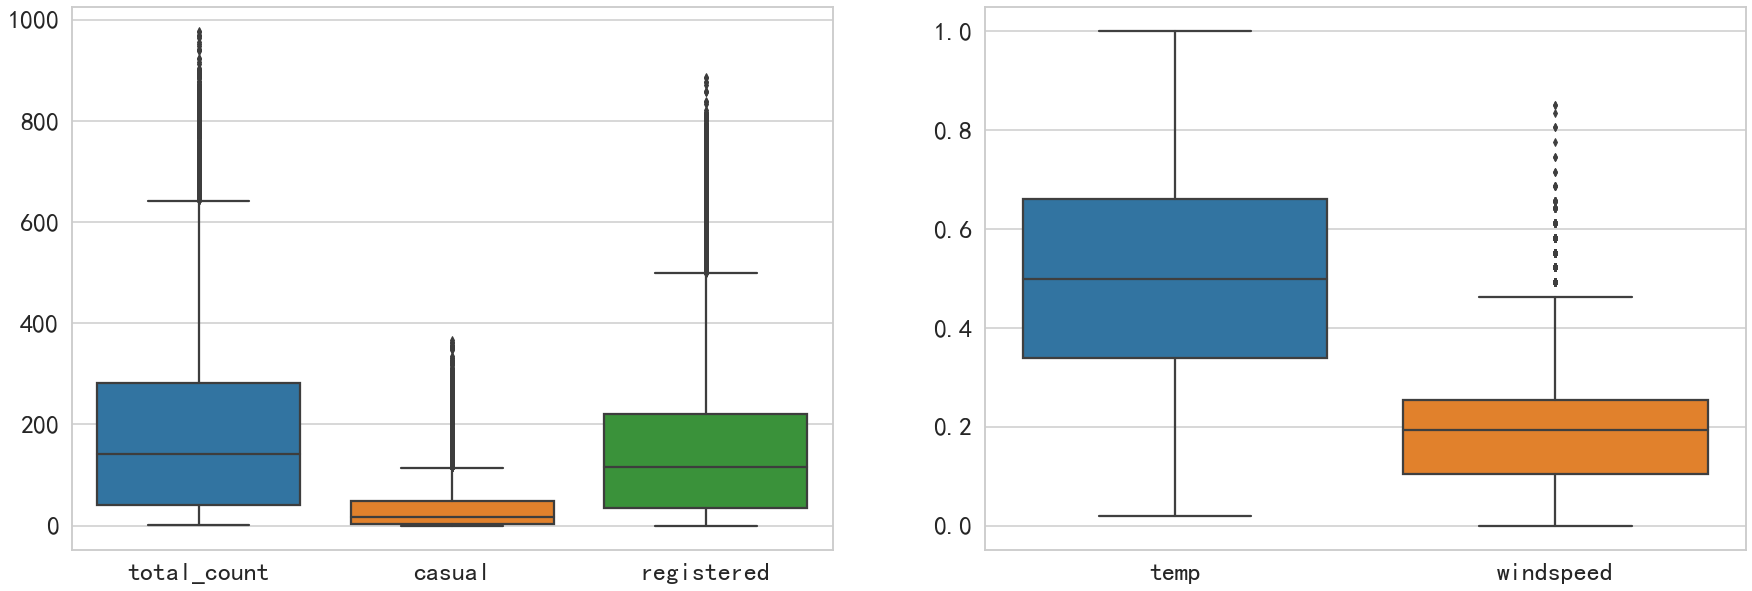

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
sn.boxplot(data=hour_df[["total_count","casual","registered"]],ax=ax1)
sn.boxplot(data=hour_df[["temp","windspeed"]],ax=ax2)

<AxesSubplot:>

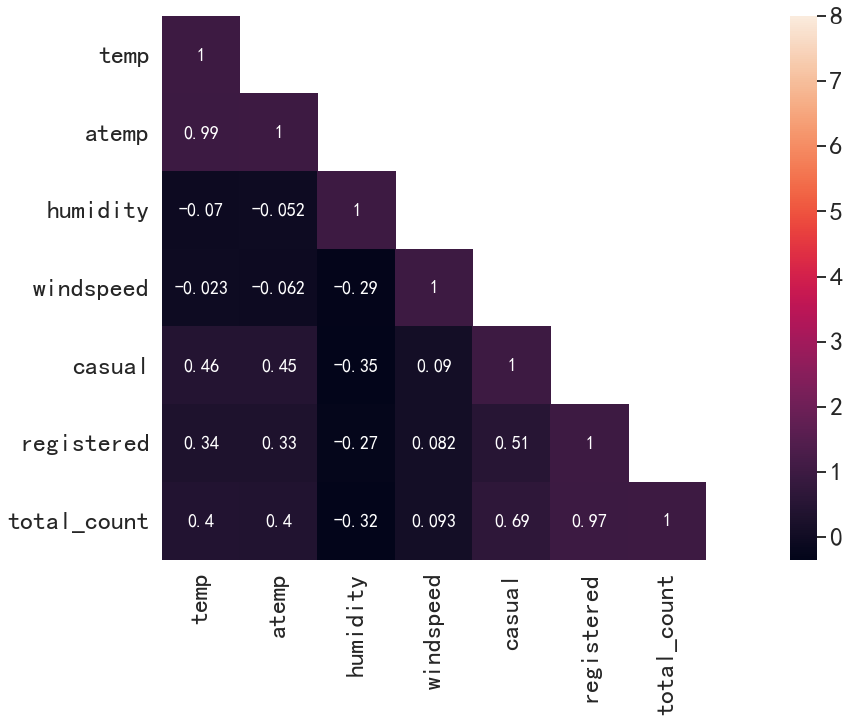

In [16]:
corrMatt = hour_df[["temp","atemp","humidity","windspeed",
                   "casual","registered","total_count"]].corr()
"""
计算相关关系必须是数值类型的数据，如果数据不是数值类型的话我们是无法
计算相关关系的。
"""
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=8, square=True, annot=True)

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def fit_transform_ohe(df, col_name):
    le = LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
    ohe = OneHotEncoder()
    feature_attr = ohe.fit_transform(df[[col_name+"_label"]]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    feature_df = pd.DataFrame(feature_attr, columns=feature_labels)
    return le, ohe, feature_df
def transform_ohe(df,le,ohe,col_name):
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    feature_arr = ohe.transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [18]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(hour_df.iloc[:,0:-3],
                                       hour_df.iloc[:,-1],
                                       test_size=0.33,
                                       random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()

In [19]:
cat_attr_list = ['season','is_holiday','weather_condition',
                'is_workingday','hour','weekday','month','year']
numeric_feature_cols = ['temp','humidity','windspeed','hour',
                       'weekday','month','year']
subset_cat_features = ['season','is_holiday','weather_condition',
                      'is_workingday']

In [20]:
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                             'ohe_enc':return_obj[1],
                             'feature_df':return_obj[2],
                             'col_name':col})

In [21]:
feature_df_list = [X[numeric_feature_cols]]
for enc in encoded_attr_list:
    if enc['col_name'] in subset_cat_features:
        feature_df_list.extend([enc['feature_df']])

In [22]:
train_df_new = pd.concat(feature_df_list, axis=1)
print("Shape:{}".format(train_df_new.shape))

Shape:(11643, 19)


In [23]:
train_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.64,0.65,0.1940,0,5,9,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.50,0.45,0.2239,13,2,3,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.86,0.47,0.5224,12,0,8,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.30,0.61,0.0000,2,3,2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.54,0.19,0.4179,17,6,4,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
"""
建立新的训练集和测试集
"""
X = train_df_new
y = y.total_count.values.reshape(-1,1)

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
"""
10折交叉验证，应该是选择效果最好的那个模型，我不确定
"""
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(lin_reg, X, y, cv=10)

Text(0, 0.5, '残差')

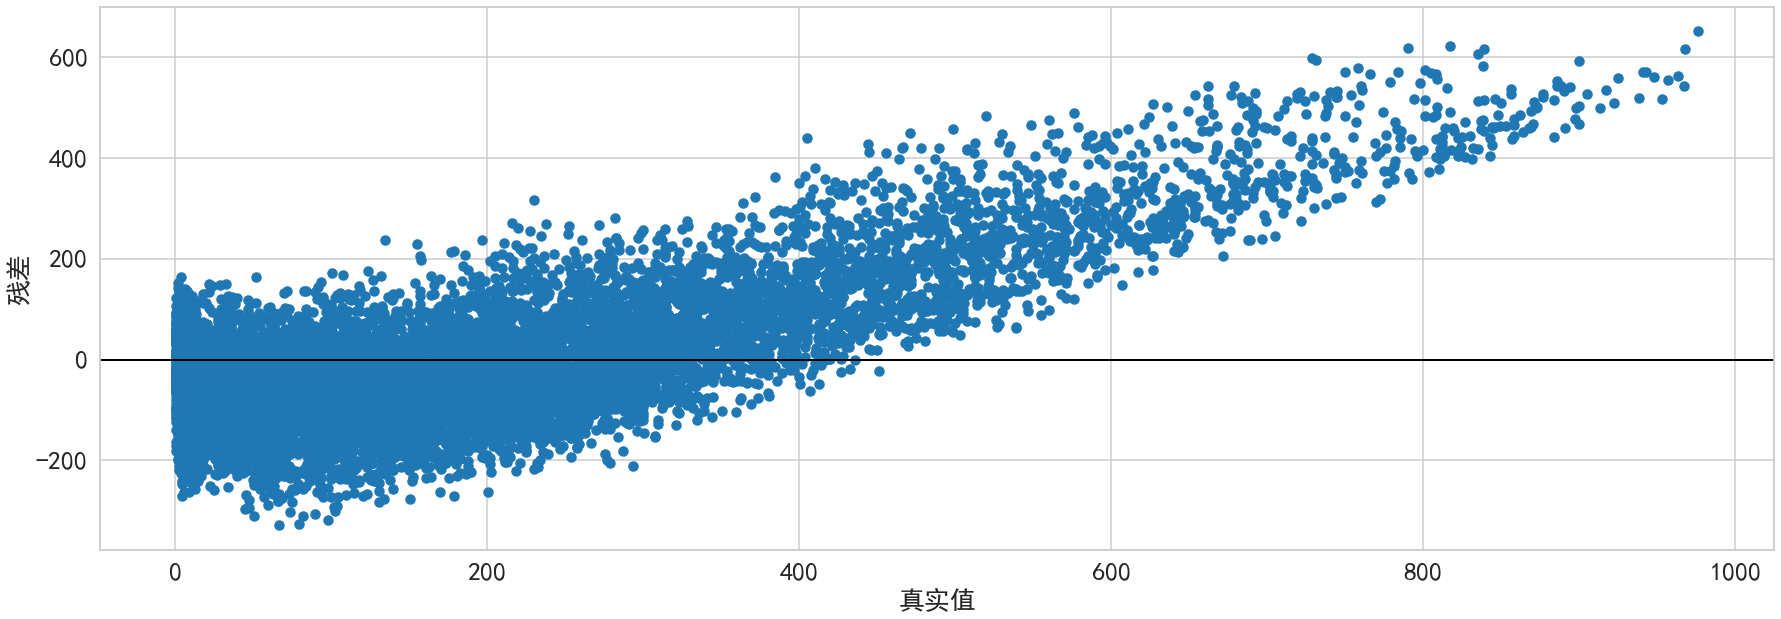

In [26]:
"""
残差的横轴是真实值，纵轴是真实值和预测值的差值。
残差分布随机，说明模型训练效果比较好。
"""
fig, ax = plt.subplots()
ax.scatter(y,y-predicted)
"""
勾画一条水平线 y=0
"""
ax.axhline(lw=2,color="black")
ax.set_xlabel("真实值")
ax.set_ylabel("残差")

In [27]:
from sklearn.model_selection import cross_val_score
"""
lin_reg是已经训练好的线性模型；
以下代码求得当前这组数据在此线性模型下的R2分数。
R2分数越接近1，说明模型拟合地越好
"""
r2_scores = cross_val_score(lin_reg,X,y,cv=10)
"""
模型返回一个数组，此数组存储了10次交叉验证的mse得分
"""
mse_scores = cross_val_score(lin_reg,X,y,cv=10,scoring="neg_mean_squared_error")

'\n39%的交叉验证得分是比较小的，模型拟合不理想\n'

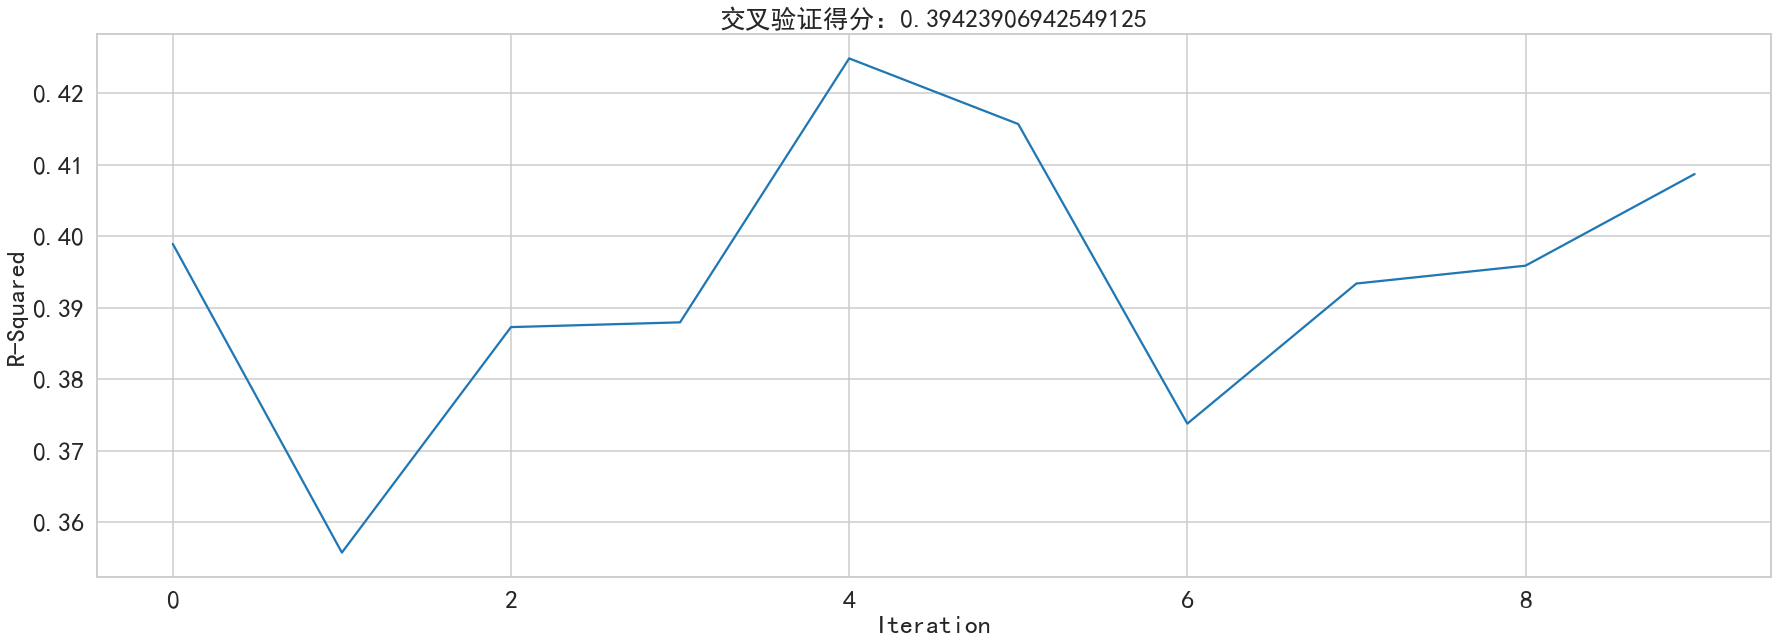

In [28]:
fig,ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
title = "交叉验证得分：" + str(np.average(r2_scores))
ax.title.set_text(title)
"""
39%的交叉验证得分是比较小的，模型拟合不理想
"""

In [29]:
print("R2 score:",str(r2_scores.mean()))
print("RMSE:",str(np.sqrt(-mse_scores).mean()))
print("mean of y:",y.mean())

R2 score: 0.39423906942549125
RMSE: 142.08580203044002
mean of y: 191.21875805204843


In [30]:
lin_reg.fit(X,y)

LinearRegression()

在sklearn中，内建了一些评估指标可供选择：<br>
<pre>の explained_variance
の neg_mean_absolute_error
の neg_mean_squared_error
の neg_median_absolute_error
の r2

In [31]:
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc["col_name"]
    le = enc["label_enc"]
    ohe = enc["ohe_enc"]
    test_encoded_attr_list.append({"feature_df":transform_ohe(X_test,le,ohe,col_name),
                                  "col_name":col_name})

test_feature_df_list = [X_test[numeric_feature_cols]]
for enc in test_encoded_attr_list:
    if enc['col_name'] in subset_cat_features:
        test_feature_df_list.extend([enc['feature_df']])
test_df_new = pd.concat(test_feature_df_list,axis=1)

In [32]:
test_df_new.head()

,temp,humidity,windspeed,hour,weekday,month,year,season_1,season_2,season_3,season_4,is_holiday_0,is_holiday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4,is_workingday_0,is_workingday_1
0,0.80,0.27,0.1940,19,6,6,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.24,0.41,0.2239,20,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.32,0.66,0.2836,2,5,10,0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.78,0.52,0.3582,19,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.26,0.56,0.3881,0,4,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
"""
X_test是新的测试集；y_test是测试集对应的目标值
"""
X_test = test_df_new
y_test = y_test.total_count.values.reshape(-1,1)

In [36]:
y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred

In [37]:
from sklearn.metrics import mean_squared_error
r2_score = lin_reg.score(X_test,y_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))

In [38]:
r2_score

0.4024409682673429

In [39]:
RMSE

138.0688225343045

Text(0, 0.5, '残差')

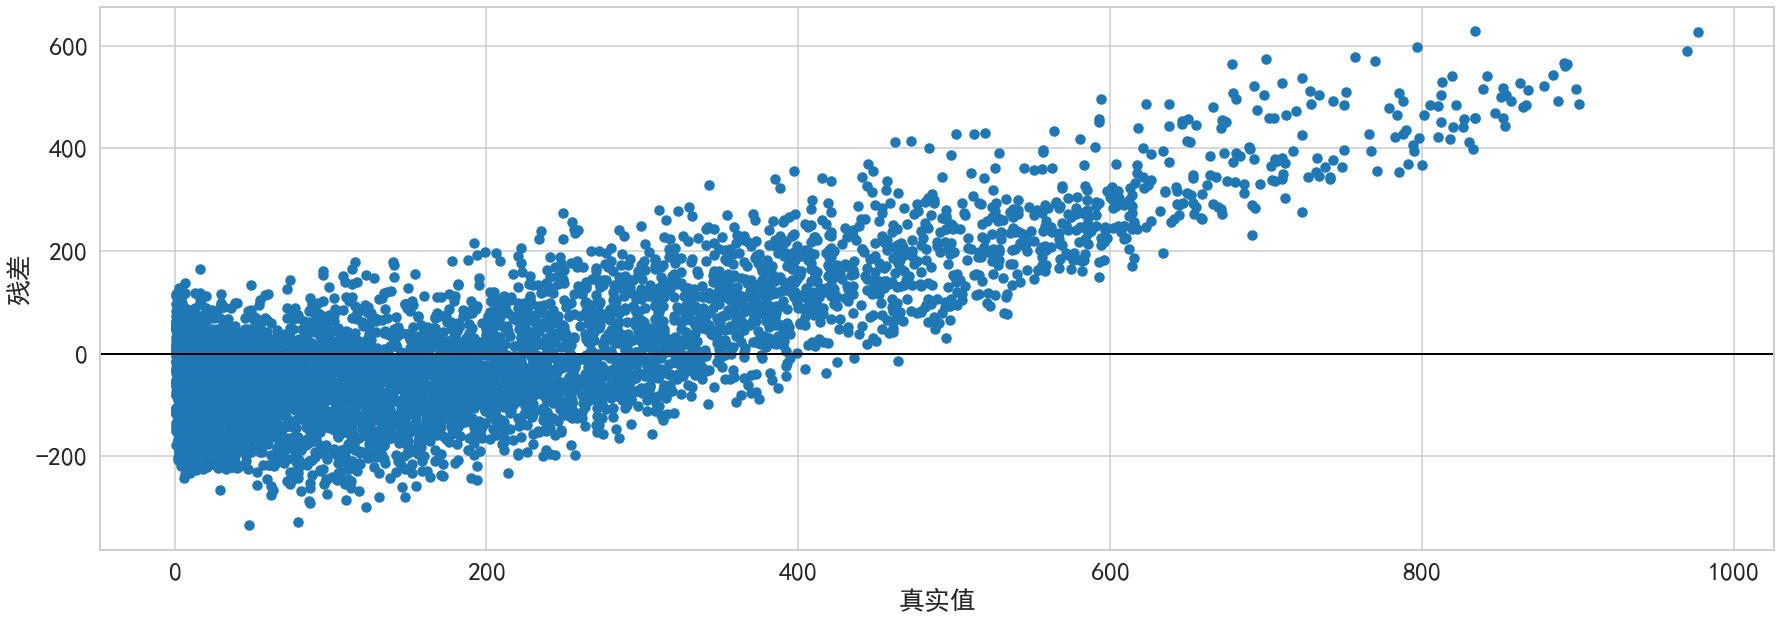

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_test,residuals)
ax.axhline(lw=2,color="black")
ax.set_xlabel("真实值")
ax.set_ylabel("残差")

In [41]:
"""
引入决策树模型。
"""
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
dtr.fit(X,y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [42]:
dtr.score(X,y)

0.5645919317952333

In [43]:
param_grid = {"criterion":["mse",],
             "min_samples_split":[10,20,40],
             "max_depth":[2,6,8],
             "min_samples_leaf":[20,40,100],
             "max_leaf_nodes":[5,20,100,500,800],
             }

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5, n_jobs=4)
grid_cv_dtr.fit(X,y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5),
             n_jobs=4,
             param_grid={'criterion': ['mse'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100, 500, 800],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [46]:
grid_cv_dtr.best_score_

0.8333284746008405

In [47]:
grid_cv_dtr.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_leaf_nodes': 500,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [48]:
df = pd.DataFrame(data=grid_cv_dtr.cv_results_)
df.sort_values(by="mean_test_score",axis=0,ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
128,0.030271,0.005457,0.003014,0.001678,mse,8,800,20,40,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 800, 'min_samples_leaf': 20, 'min_samples_split': 40}",0.811270,0.838794,0.841177,0.821788,0.853613,0.833328,0.014985,1
127,0.031936,0.004170,0.000617,0.001234,mse,8,800,20,20,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 800, 'min_samples_leaf': 20, 'min_samples_split': 20}",0.811270,0.838794,0.841177,0.821788,0.853613,0.833328,0.014985,1
126,0.028903,0.004565,0.004302,0.002719,mse,8,800,20,10,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 800, 'min_samples_leaf': 20, 'min_samples_split': 10}",0.811270,0.838794,0.841177,0.821788,0.853613,0.833328,0.014985,1
117,0.025462,0.002317,0.004600,0.002871,mse,8,500,20,10,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 10}",0.811270,0.838794,0.841177,0.821788,0.853613,0.833328,0.014985,1
118,0.029552,0.001369,0.001596,0.001493,mse,8,500,20,20,"{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 20}",0.811270,0.838794,0.841177,0.821788,0.853613,0.833328,0.014985,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.012207,0.003176,0.002619,0.003350,mse,2,500,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf_nodes': 500, 'min_samples_leaf': 20, 'min_samples_split': 20}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,91
41,0.017751,0.002032,0.004189,0.000978,mse,2,800,40,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf_nodes': 800, 'min_samples_leaf': 40, 'min_samples_split': 40}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,91
26,0.011805,0.003534,0.002615,0.002166,mse,2,100,100,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 40}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,91
25,0.013027,0.003905,0.002003,0.002453,mse,2,100,100,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 20}",0.392674,0.400027,0.417498,0.399368,0.417796,0.405472,0.010268,91


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

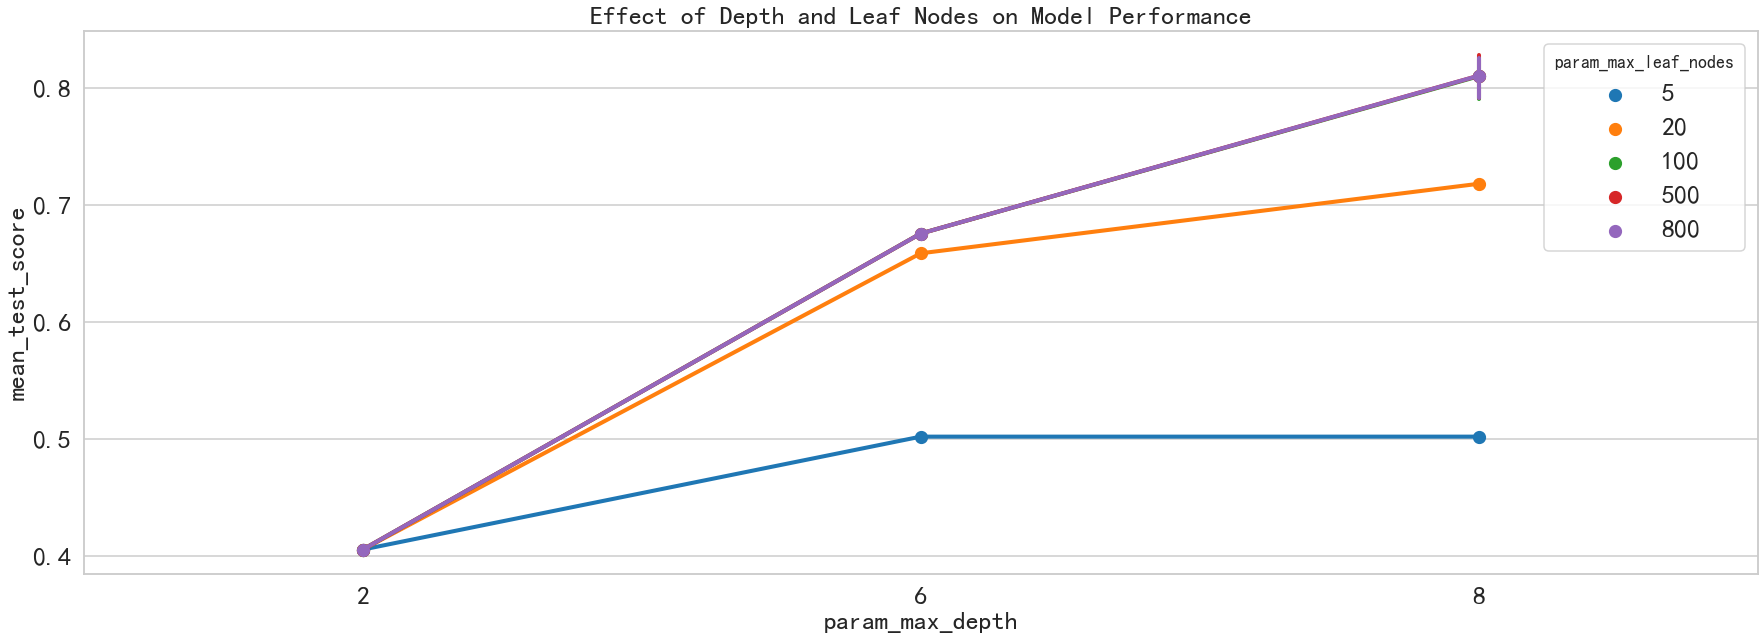

In [49]:
fig,ax = plt.subplots()
sn.pointplot(data=df[["mean_test_score",
                     "param_max_leaf_nodes",
                     "param_max_depth"]],
            y = "mean_test_score", x = "param_max_depth",
            hue = "param_max_leaf_nodes", ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [50]:
predicted = grid_cv_dtr.best_estimator_.predict(X)
residuals = y.flatten()-predicted

Text(0, 0.5, '残差')

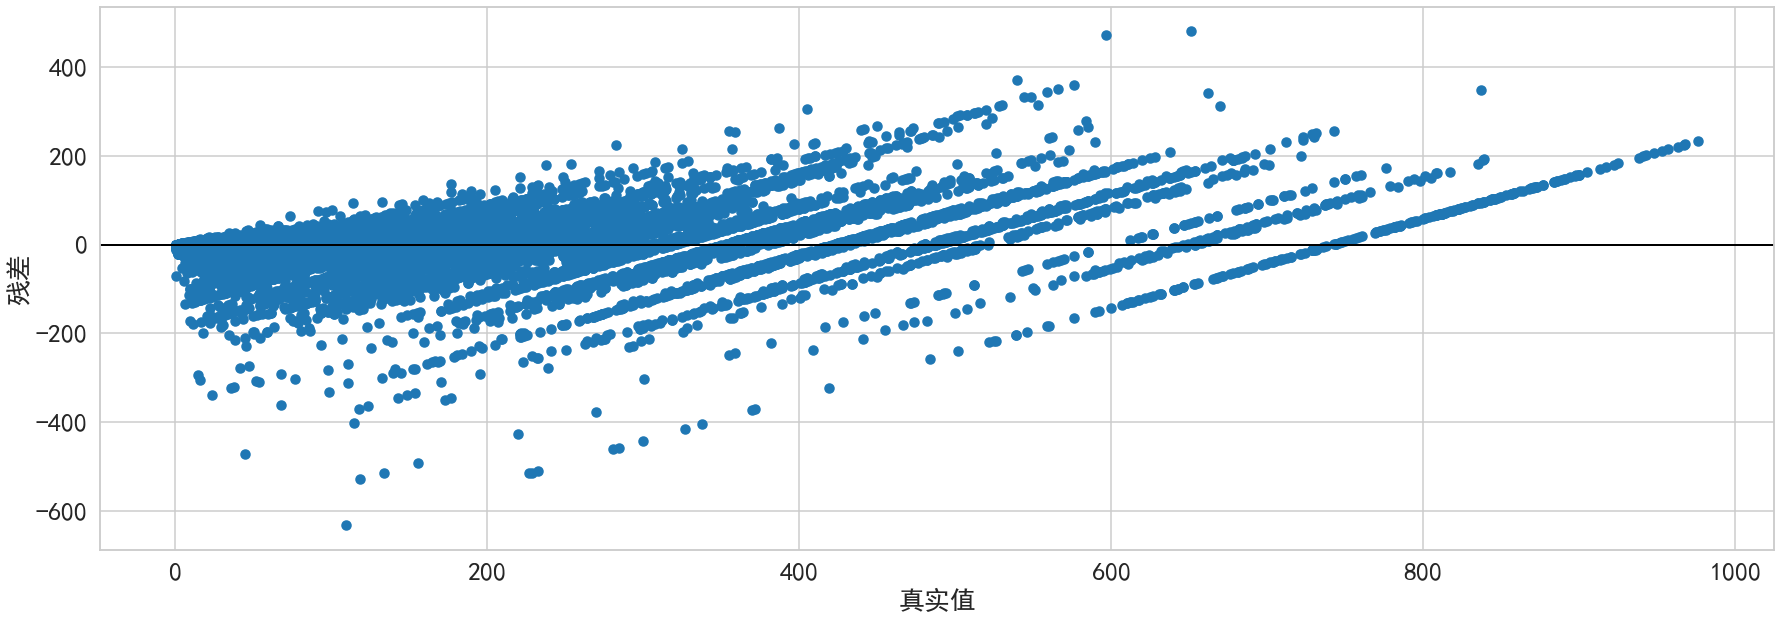

In [51]:
fig, ax = plt.subplots()
ax.scatter(y.flatten(),residuals)
ax.axhline(lw=2,color="black")
ax.set_xlabel("真实值")
ax.set_ylabel("残差")

In [52]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_,X,y,cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_,X,y,cv=10,scoring="neg_mean_squared_error")

In [53]:
np.mean(r2_scores)

0.8375948069484194

In [54]:
np.mean(np.sqrt(-mse_scores))

73.40946399323023

In [55]:
best_dtr_model = grid_cv_dtr.best_estimator_

In [56]:
y_pred = best_dtr_model.predict(X_test)
residuals = y_test.flatten() - y_pred

In [57]:
r2_score = best_dtr_model.score(X_test, y_test)
r2_score

0.8478415542500741

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

69.67119272556559

Text(0, 0.5, '残差')

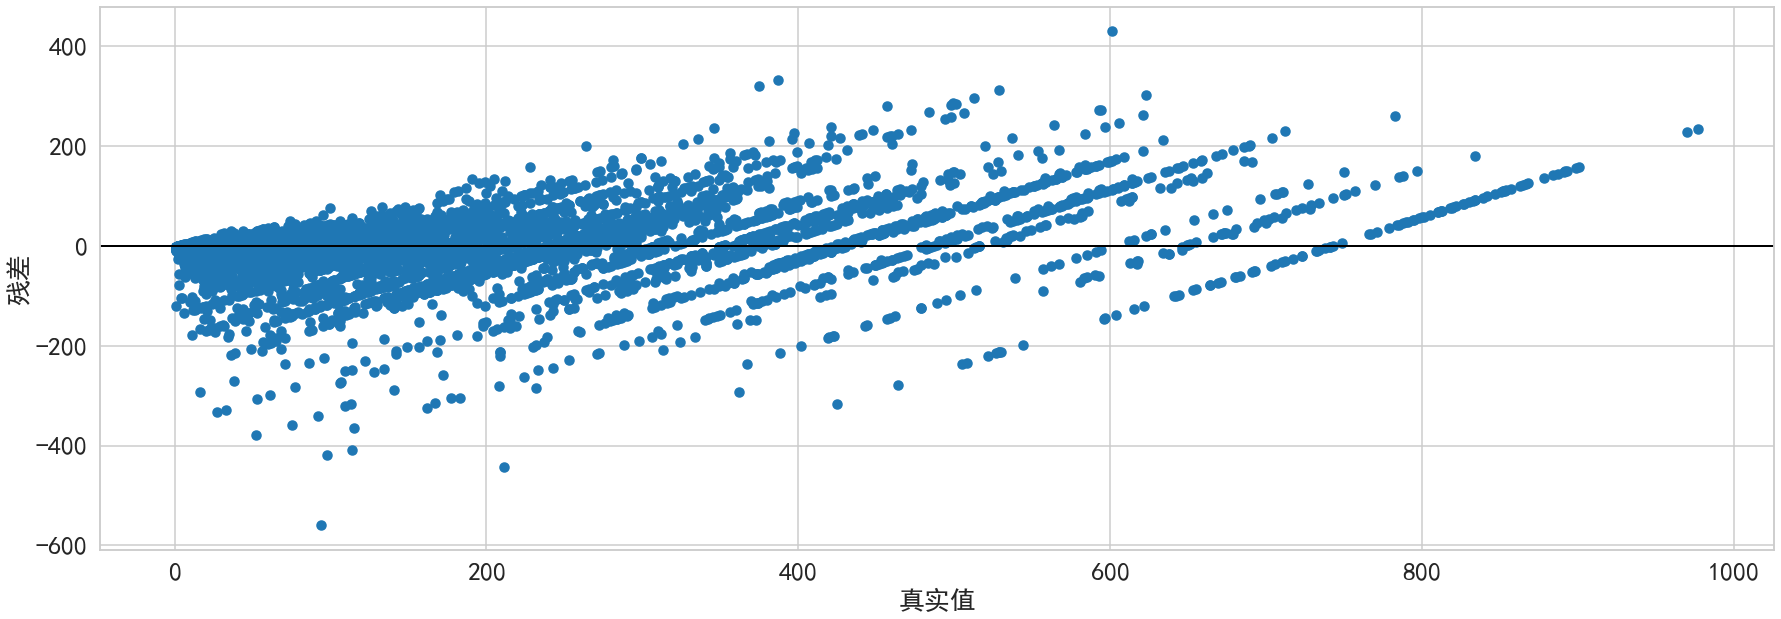

In [59]:
fig, ax = plt.subplots()
ax.scatter(y_test.flatten(), residuals)
ax.axhline(lw=2,color="black")
ax.set_xlabel("真实值")
ax.set_ylabel("残差")

In [60]:
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dtr, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("bikeshare.pdf")

True